# Classification Algorithms with Python

For this lecture we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in machine learning! 

We'll be trying to predict a classification- survival or deceased.
Let's begin our understanding of implementing Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set, if you use the data set hosted directly on Kaggle, you may need to do some additional cleaning not shown here.

## Import Libraries
Let's import some libraries to get started!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"

# InteractiveShell.ast_node_interactivity = "last_expr"

In [3]:
2+3
5-6

5

-1

## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [4]:
train = pd.read_csv('titanic_train.csv')

In [5]:
train.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# !pip install pandas-profiling   

In [8]:
import pandas_profiling
pandas_profiling.ProfileReport(train)

In [9]:
profile = pandas_profiling.ProfileReport(train)
profile.to_file(output_file="Titanic data profiling.html")

In [6]:
train.tail()

PassengerId  Survived  Pclass                                      Name  \
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
886    male  27.0      0      0      211536  13.00   NaN        S  
887  female  19.0      0      0      112053  30.00   B42        S  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


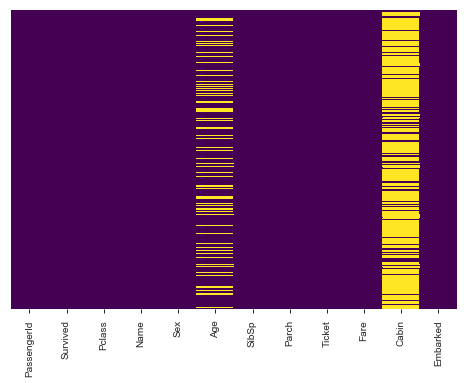

In [10]:
sns.heatmap(train.isnull(), yticklabels=False,\
            cbar=False,cmap='viridis')

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0".

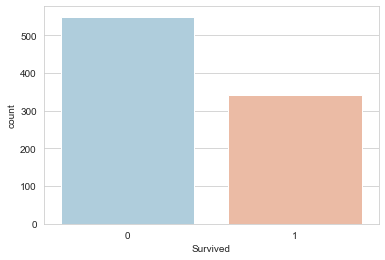

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

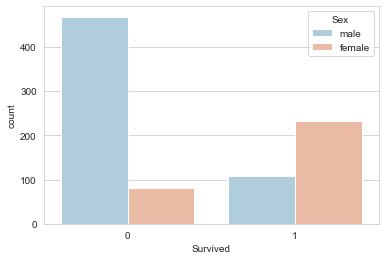

In [9]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train, palette='RdBu_r')

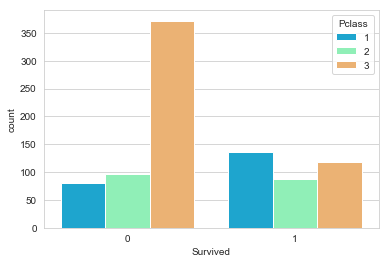

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train, palette='rainbow')

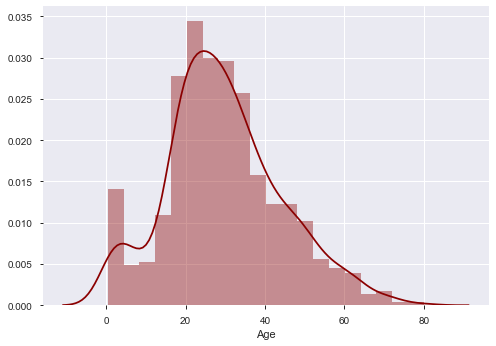

In [10]:
sns.distplot(train['Age'].dropna(),kde=True, color='darkred',bins=20)

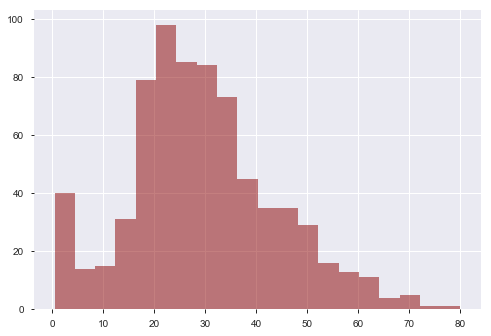

In [12]:
train['Age'].hist(bins=20,color='darkred',alpha=0.5)

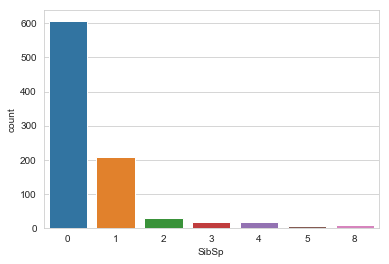

In [25]:
sns.countplot(x='SibSp',data=train)

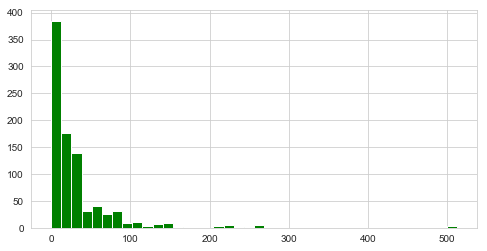

In [26]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

____
### Cufflinks for plots
___
 Let's take a quick moment to show an example of cufflinks!

In [22]:
# !pip install cufflinks

  Using cached https://files.pythonhosted.org/packages/ff/75/3982bac5076d0ce6d23103c03840fcaec90c533409f9d82c19f54512a38a/plotly-3.10.0-py2.py3-none-any.whl
  Found existing installation: plotly 4.1.0
    Uninstalling plotly-4.1.0:
      Successfully uninstalled plotly-4.1.0


In [16]:
import cufflinks as cf
cf.go_offline()

In [18]:
train['Fare'].iplot(kind='hist',bins=30,color='green')
plt.show()

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


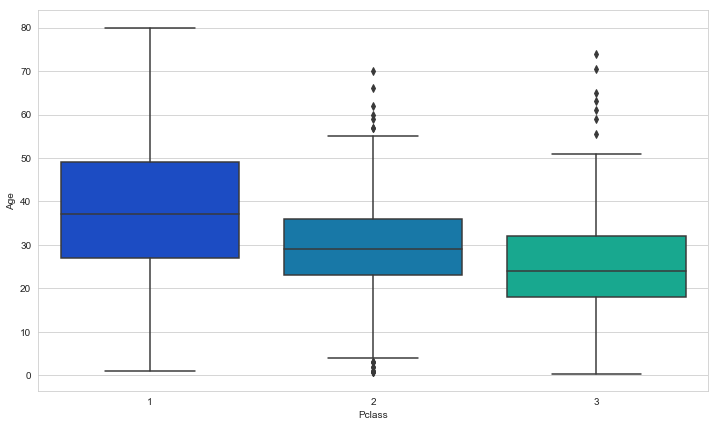

In [30]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [19]:
train.head(10)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54.0      0   
7                     Palsson, Master. Gosta Leonard    male   2.0      3   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
5      0            330877   8.4583   NaN        Q  
6      0             17463  51.8625   E46        S  
7      1            349909  21.0750   NaN        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C

In [13]:
train[train['Pclass']==1]['Age'].mean()

38.233440860215055

In [14]:
train[train['Pclass']==1]['Age'].mean()
train[train['Pclass']==2]['Age'].mean()
train[train['Pclass']==3]['Age'].mean()

38.233440860215055

29.87763005780347

25.14061971830986

In [16]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38.23

        elif Pclass == 2:
            return 29.87

        else:
            return 25.140

    else:
        return Age

Now apply that function!

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [19]:
age_mean = train.groupby('Pclass')['Age'].mean()
age_mean

Pclass
1    38.232963
2    29.877174
3    25.140448
Name: Age, dtype: float64

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Now let's check that heat map again!

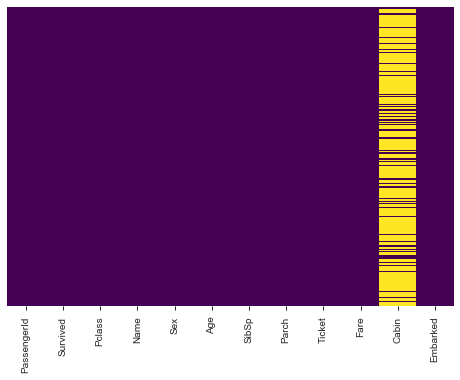

In [22]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [39]:
train.info()
# pandas_profiling.ProfileReport(train)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [23]:
train.drop(['Name', 'Ticket', 'Cabin'], inplace=True, axis=1)

In [26]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [24]:
train.head(2)

PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0            1         0       3    male  22.0      1      0   7.2500        S
1            2         1       1  female  38.0      1      0  71.2833        C

In [25]:
train.dropna(inplace=True)

## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(2)
memory usage: 69.5+ KB


In [26]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [41]:
#sex = pd.get_dummies(train['Sex'],drop_first=False)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [42]:
embark

Q  S
0    0  1
1    0  0
2    0  1
3    0  1
4    0  1
..  .. ..
886  0  1
887  0  1
888  0  1
889  0  0
890  1  0

[889 rows x 2 columns]

In [38]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
train['Sex'] = LE.fit_transform(train['Sex'])

In [39]:
train['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 889, dtype: int32

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(["paris", "Paris", "tokyo", "amsterdam", 'paris', 'tokyo'])

LabelEncoder()

In [33]:
list(le.classes_)

['Paris', 'amsterdam', 'paris', 'tokyo']

In [35]:
le.transform(["tokyo", "tokyo", "paris", 'Paris']) 

array([3, 3, 2, 0], dtype=int64)

In [36]:
list(le.inverse_transform([2, 2, 0, 1])) #to fetch the actual labels against 
# the given numeric label

['paris', 'paris', 'Paris', 'amsterdam']

In [40]:
train['Sex'].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int32

In [43]:
train['Embarked'] = LE.fit_transform(train['Embarked'])

In [44]:
train.head()

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0            1         0       3    1  22.0      1      0   7.2500         2
1            2         1       1    0  38.0      1      0  71.2833         0
2            3         1       3    0  26.0      0      0   7.9250         2
3            4         1       1    0  35.0      1      0  53.1000         2
4            5         0       3    1  35.0      0      0   8.0500         2

Great! Our data is ready for our model!

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

## Train Test Split

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X = train.drop('Survived', axis=1)
Y = train['Survived']

X_train, X_test, y_train, y_test = train_test_split(X,Y, \
                                                    test_size=0.30, 
                                                    random_state=101)

## Training and Predicting

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
logmodel = LogisticRegression() # , class_weight='balanced'
logmodel

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [50]:
lm = logmodel.fit(X_train,y_train)
lm

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
predictions = logmodel.predict(X_test)

In [52]:
logmodel.predict_proba(X_test[:5])

array([[0.87228569, 0.12771431],
       [0.85301938, 0.14698062],
       [0.24700667, 0.75299333],
       [0.09146954, 0.90853046],
       [0.84294839, 0.15705161]])

In [54]:
y_test[:5]

511    0
613    0
615    1
337    1
718    0
Name: Survived, dtype: int64

Let's move on to evaluate our model!

## Evaluation

We can check precision,recall,f1-score using classification report!

In [54]:
from sklearn.metrics import classification_report

In [55]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       163
           1       0.85      0.66      0.75       104

   micro avg       0.82      0.82      0.82       267
   macro avg       0.83      0.79      0.81       267
weighted avg       0.83      0.82      0.82       267



In [56]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,predictions)
print(matrix)

[[151  12]
 [ 35  69]]


In [57]:
logmodel.score(X_test, y_test) #this is the accuracy score

0.8239700374531835

In [58]:
predictions[:5]

array([0, 0, 1, 1, 0], dtype=int64)

In [59]:
type(predictions)

numpy.ndarray

In [60]:
df = pd.DataFrame(y_test)
df['Predicted'] = predictions

In [61]:
df.tail()

Survived  Predicted
792         0          0
828         1          0
732         0          0
669         1          1
634         0          1

In [62]:
logmodel.predict_proba(X_test[:5]) 

array([[0.86961064, 0.13038936],
       [0.85230377, 0.14769623],
       [0.245164  , 0.754836  ],
       [0.09219355, 0.90780645],
       [0.84214636, 0.15785364]])

In [63]:
df1 = pd.DataFrame(logmodel.coef_, columns=X.columns)
df1

PassengerId   Pclass       Sex      Age     SibSp     Parch     Fare  \
0     0.000407 -0.78506 -2.344978 -0.02657 -0.213665 -0.099601  0.00461   

   Embarked  
0 -0.104571

In [64]:
logmodel.intercept_

array([3.40379202])

Not so bad! You might want to explore other feature engineering and the other titanic_text.csv file, some suggestions for feature engineering:

* Try grabbing the Title (Dr.,Mr.,Mrs,etc..) from the name as a feature
* Maybe the Cabin letter could be a feature
* Is there any info you can get from the ticket?


In [65]:
from sklearn.linear_model import SGDClassifier
SGD_clf = SGDClassifier()

In [66]:
SGD_clf.fit(X_train, y_train)  # default loss='hinge'

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning:

max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.



SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [67]:
predictions = logmodel.predict(X_test)
SGD_clf.score(X_test, y_test)

0.6367041198501873

In [68]:
# Load libraries
# import pandas
# import numpy
# import matplotlib.pyplot as plt
# from pandas.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# from sklearn.preprocessing import Imputer
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

In [69]:
import warnings
warnings.simplefilter("ignore")

In [70]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models

[('LR',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='warn',
            n_jobs=None, penalty='l2', random_state=None, solver='warn',
            tol=0.0001, verbose=0, warm_start=False)),
 ('LDA',
  LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                solver='svd', store_covariance=False, tol=0.0001)),
 ('KNN',
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, n_neighbors=5, p=2,
             weights='uniform')),
 ('CART',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best')),
 ('NB'

In [73]:
from sklearn.model_selection import KFold, cross_val_score
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, \
                                  random_state=5)
    cv_results = model_selection.cross_val_score(model, X_train, \
                                                 y_train, cv=kfold, \
                                                 scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %5.2f (%5.2f)" % (name, cv_results.mean()*100, \
                           cv_results.std()*100)
    print(msg)

LR: 78.61 ( 1.72)
LDA: 79.09 ( 1.67)
KNN: 65.27 ( 2.16)
CART: 72.19 ( 1.47)
NB: 77.81 ( 1.97)
SVM: 62.22 ( 1.65)


In [74]:
results

[array([0.816     , 0.792     , 0.78225806, 0.77419355, 0.76612903]),
 array([0.816     , 0.8       , 0.79032258, 0.78225806, 0.76612903]),
 array([0.64      , 0.656     , 0.68548387, 0.66129032, 0.62096774]),
 array([0.736     , 0.704     , 0.71774194, 0.74193548, 0.70967742]),
 array([0.792     , 0.776     , 0.80645161, 0.75      , 0.76612903]),
 array([0.608     , 0.608     , 0.62096774, 0.62096774, 0.65322581])]

In [75]:
results_df = pd.DataFrame(results, index=names, \
                          columns='CV1 CV2 CV3 CV4 CV5'.split())

In [76]:
# results_df.drop(['CV Mean', 'CV Std Dev'], inplace=True, axis = 1)
results_df

CV1    CV2       CV3       CV4       CV5
LR    0.816  0.792  0.782258  0.774194  0.766129
LDA   0.816  0.800  0.790323  0.782258  0.766129
KNN   0.640  0.656  0.685484  0.661290  0.620968
CART  0.736  0.704  0.717742  0.741935  0.709677
NB    0.792  0.776  0.806452  0.750000  0.766129
SVM   0.608  0.608  0.620968  0.620968  0.653226

In [77]:
results_df['CV Mean'] = results_df.iloc[:,0:n_splits].mean(axis=1)
results_df['CV Std Dev'] = results_df.iloc[:,0:n_splits].std(axis=1)

In [78]:
pd.set_option('precision',2)
results_df*100

CV1   CV2    CV3    CV4    CV5  CV Mean  CV Std Dev
LR    81.6  79.2  78.23  77.42  76.61    78.61        1.93
LDA   81.6  80.0  79.03  78.23  76.61    79.09        1.87
KNN   64.0  65.6  68.55  66.13  62.10    65.27        2.41
CART  73.6  70.4  71.77  74.19  70.97    72.19        1.65
NB    79.2  77.6  80.65  75.00  76.61    77.81        2.20
SVM   60.8  60.8  62.10  62.10  65.32    62.22        1.85

In [79]:
results_df.sort_values(by='CV Mean', ascending=False)*100

CV1   CV2    CV3    CV4    CV5  CV Mean  CV Std Dev
LDA   81.6  80.0  79.03  78.23  76.61    79.09        1.87
LR    81.6  79.2  78.23  77.42  76.61    78.61        1.93
NB    79.2  77.6  80.65  75.00  76.61    77.81        2.20
CART  73.6  70.4  71.77  74.19  70.97    72.19        1.65
KNN   64.0  65.6  68.55  66.13  62.10    65.27        2.41
SVM   60.8  60.8  62.10  62.10  65.32    62.22        1.85

In [ ]:
# InteractiveShell.ast_node_interactivity = "last_expr"

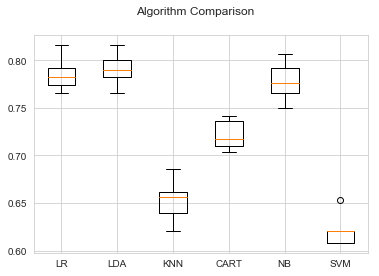

In [80]:
# %matplotlib inline
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [81]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=5)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std()*100)
#     print(msg)

results_df = pd.DataFrame(results, index=names, \
                          columns='CV1 CV2 CV3 CV4 CV5'.split())
results_df['CV Mean'] = results_df.iloc[:,0:n_splits].mean(axis=1)
results_df['CV Std Dev'] = results_df.iloc[:,0:n_splits].std(axis=1)
results_df.sort_values(by='CV Mean', ascending=False)*100

CV1   CV2    CV3    CV4    CV5  CV Mean  CV Std Dev
ScaledLR    81.6  79.2  79.84  79.84  78.23    79.74        1.23
ScaledKNN   80.8  82.4  76.61  83.06  75.81    79.74        3.34
ScaledSVM   80.8  82.4  77.42  79.03  76.61    79.25        2.38
ScaledLDA   81.6  80.0  79.03  78.23  76.61    79.09        1.87
ScaledNB    79.2  77.6  80.65  75.00  76.61    77.81        2.20
ScaledCART  76.0  71.2  69.35  79.03  73.39    73.79        3.84

In [ ]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [82]:
# Normalize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('LR', LogisticRegression())])))
pipelines.append(('ScaledLDA', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('KNN', ])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('CART', DecisionTreeClassifieKNeighborsClassifier())r())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('NB', GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', MinMaxScaler(feature_range=(0, 1))),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=5)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std()*100)
#     print(msg)

results_df = pd.DataFrame(results, index=names, \
                          columns='CV1 CV2 CV3 CV4 CV5'.split())
results_df['CV Mean'] = results_df.iloc[:,0:n_splits].mean(axis=1)
results_df['CV Std Dev'] = results_df.iloc[:,0:n_splits].std(axis=1)
results_df.sort_values(by='CV Mean', ascending=False)*100

CV1   CV2    CV3    CV4    CV5  CV Mean  CV Std Dev
ScaledLR    81.6  80.8  78.23  78.23  77.42    79.25        1.83
ScaledLDA   81.6  80.0  79.03  78.23  76.61    79.09        1.87
ScaledKNN   80.8  83.2  75.81  80.65  75.00    79.09        3.53
ScaledSVM   83.2  79.2  77.42  78.23  74.19    78.45        3.25
ScaledNB    79.2  77.6  80.65  75.00  76.61    77.81        2.20
ScaledCART  76.8  72.8  73.39  76.61  74.19    74.76        1.85

In [ ]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [83]:
# ensembles
ensembles = []
ensembles.append(('ScaledAB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostClassifier())])))
ensembles.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingClassifier())])))  
ensembles.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestClassifier())])))
ensembles.append(('ScaledET', Pipeline([('Scaler', StandardScaler()),('ET', ExtraTreesClassifier())])))
results = []
names = []
for name, model in ensembles:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=5)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean()*100, cv_results.std()*100)
#     print(msg)
    
results_df = pd.DataFrame(results, index=names, \
                          columns='CV1 CV2 CV3 CV4 CV5'.split())
results_df['CV Mean'] = results_df.iloc[:,0:n_splits].mean(axis=1)
results_df['CV Std Dev'] = results_df.iloc[:,0:n_splits].std(axis=1)
results_df.sort_values(by='CV Mean', ascending=False)*100

CV1   CV2    CV3    CV4    CV5  CV Mean  CV Std Dev
ScaledGBM  82.4  80.8  76.61  82.26  80.65    80.54        2.34
ScaledRF   81.6  76.0  79.03  79.84  79.84    79.26        2.05
ScaledET   79.2  74.4  74.19  78.23  81.45    77.49        3.15
ScaledAB   79.2  76.8  73.39  77.42  75.81    76.52        2.14

In [ ]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [87]:
# Tune scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21,25,30,35,40,50]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier('euclidean')

kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=5)
grid = GridSearchCV(estimator=model, param_grid=param_grid, \
                    scoring='accuracy', cv=kfold, )

grid_result = grid.fit(rescaledX, y_train)

In [88]:
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.799035 using {'n_neighbors': 9}


In [89]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.755627 (0.031057) with: {'n_neighbors': 1}
0.787781 (0.013659) with: {'n_neighbors': 3}
0.797428 (0.031419) with: {'n_neighbors': 5}
0.794212 (0.016938) with: {'n_neighbors': 7}
0.799035 (0.022855) with: {'n_neighbors': 9}
0.795820 (0.022621) with: {'n_neighbors': 11}
0.797428 (0.016158) with: {'n_neighbors': 13}
0.792605 (0.014524) with: {'n_neighbors': 15}
0.790997 (0.014051) with: {'n_neighbors': 17}
0.784566 (0.016236) with: {'n_neighbors': 19}
0.776527 (0.014396) with: {'n_neighbors': 21}
0.779743 (0.011386) with: {'n_neighbors': 25}
0.778135 (0.006584) with: {'n_neighbors': 30}
0.774920 (0.012953) with: {'n_neighbors': 35}
0.779743 (0.016731) with: {'n_neighbors': 40}
0.794212 (0.020770) with: {'n_neighbors': 50}


In [90]:
model = KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [91]:
model.fit( rescaledX, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [92]:
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
degree_values = [2,3,4,5]
gamma_values =[0.1, 0.5, 1, 2]
param_grid = dict(C=c_values, kernel=kernel_values, degree=degree_values, \
                 gamma = gamma_values)
model = SVC()